# Initialisierung

**Libraries**<br>
pandas:     Datenverarbeitung<br>
os:         Betriebsystem-Funktionen für relative Pfadreferenzierung<br>
datetime:   Verarbeitung der Timstamps<br>

In [211]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

dirname = os.path.abspath('')

df_path = os.path.join(dirname, '2019_Merged_Data_15min.csv')

#   Distribution
**Outlier Detection**

In [212]:
df = pd.read_csv(df_path)
# Get column names
column_names = df.columns.tolist()

df = df.drop('MESS_DATUM', axis=1)
df_with_outliers = df

# Print the list of column names
print("Column names:", column_names)
print("Shape (rows, columns):", df.shape)

# Standardize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Define a threshold for Z-score
threshold = 2  # Adjust as needed

# Calculate the Z-scores
z_scores = np.abs(data_scaled)

# Identify outliers based on the threshold for each column
outliers = np.where(z_scores > threshold)

# Convert the entire DataFrame to a suitable data type (float64)
df = df.astype(np.float64)

# Delete outliers for each column
outlier_counts = {}

for col_idx, col in enumerate(df.columns):
    outliers_in_col = outliers[0][outliers[1] == col_idx]
    outlier_count = len(outliers_in_col)
    outlier_counts[col] = outlier_count

    df[col].iloc[outliers_in_col] = np.nan

# Print the outlier counts for each column
print("Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Drop rows with NaN values
df = df.dropna()

print("Shape (rows, columns):", df.shape)
print("Datarow loss when dropping outliers:", (1-df.shape[0]/df_with_outliers.shape[0])*100)

Column names: ['MESS_DATUM', 'RWS_DAU_10', 'RWS_10', 'DS_10', 'GS_10', 'SD_10', 'FF_10', 'DD_10', 'PP_10', 'TT_10', 'TM5_10', 'RF_10']
Shape (rows, columns): (52560, 11)
Outlier Counts:
RWS_DAU_10: 4923
RWS_10: 30
DS_10: 149
GS_10: 149
SD_10: 7773
FF_10: 3
DD_10: 1112
PP_10: 2945
TT_10: 2097
TM5_10: 2271
RF_10: 2364
Shape (rows, columns): (35310, 11)
Datarow loss when dropping outliers: 32.81963470319634


In [213]:
df = pd.read_csv(df_path)
# Get column names
column_names = df.columns.tolist()

#df = df.drop('MESS_DATUM', axis=1)
df_with_outliers = df

# Print the list of column names
print("Column names:", column_names)
print("Shape (rows, columns):", df.shape)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Standardize the numeric data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Define a threshold for Z-score
threshold = 3  # Adjust as needed

# Calculate the Z-scores for numeric columns
z_scores = np.abs(data_scaled)

# Identify outliers based on the threshold for each numeric column
outliers = np.where(z_scores > threshold)

# Delete outliers for each numeric column
outlier_counts = {}

for col in df_numeric.columns:
    outliers_in_col = outliers[0][outliers[1] == df_numeric.columns.get_loc(col)]
    outlier_count = len(outliers_in_col)
    outlier_counts[col] = outlier_count

    df_numeric.loc[outliers_in_col, col] = np.nan

# Print the outlier counts for each numeric column
print("Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Merge the numeric columns with the non-numeric columns
df = pd.concat([df_numeric, df.select_dtypes(exclude=[np.number])], axis=1)

# Drop rows with NaN values in numeric columns
df = df.dropna(subset=df_numeric.columns)

print("Shape (rows, columns):", df.shape)
print("Datarow loss when dropping outliers:", (1-df.shape[0]/df_with_outliers.shape[0])*100)

df.to_csv('2019_Cleaned_Data_15min.csv', index=False) #index=FALSE for not including row indices

Column names: ['MESS_DATUM', 'RWS_DAU_10', 'RWS_10', 'DS_10', 'GS_10', 'SD_10', 'FF_10', 'DD_10', 'PP_10', 'TT_10', 'TM5_10', 'RF_10']
Shape (rows, columns): (52560, 12)
Outlier Counts:
RWS_DAU_10: 3728
RWS_10: 30
DS_10: 149
GS_10: 149
SD_10: 0
FF_10: 3
DD_10: 3
PP_10: 95
TT_10: 117
TM5_10: 198
RF_10: 44
Shape (rows, columns): (48334, 12)
Datarow loss when dropping outliers: 8.040334855403353


**Plotting**

Text(0, 0.5, 'Density')

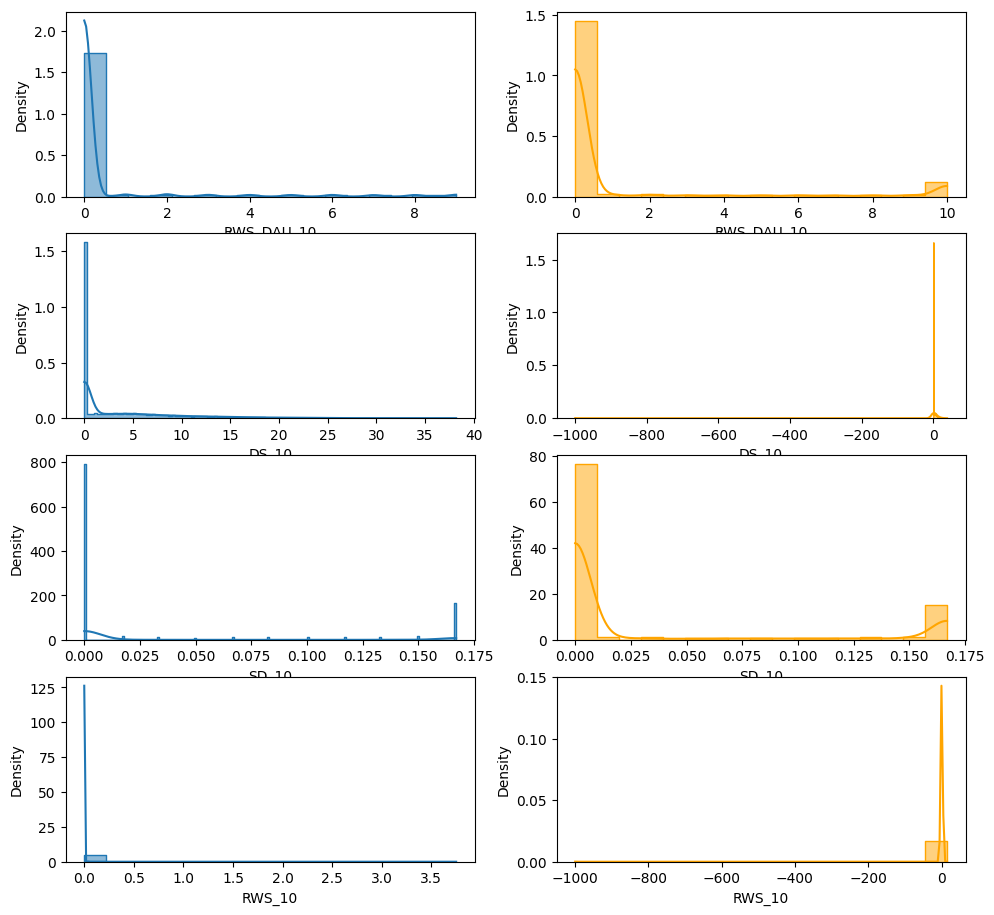

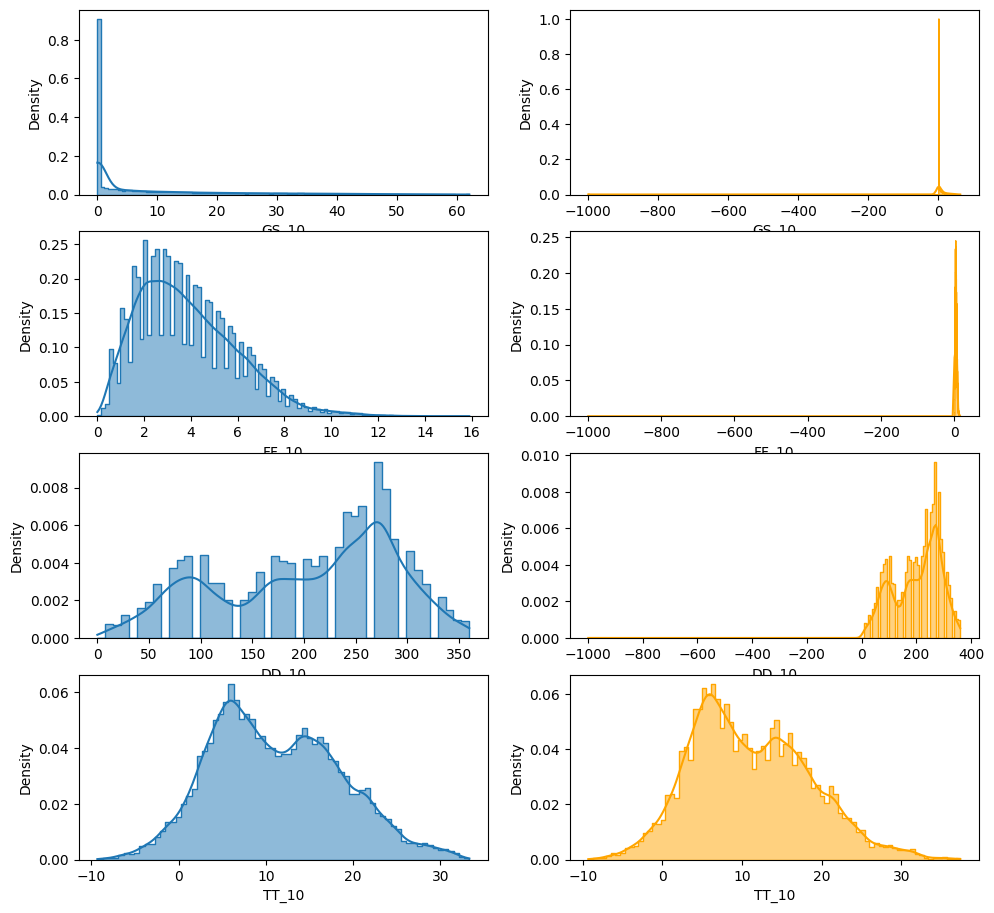

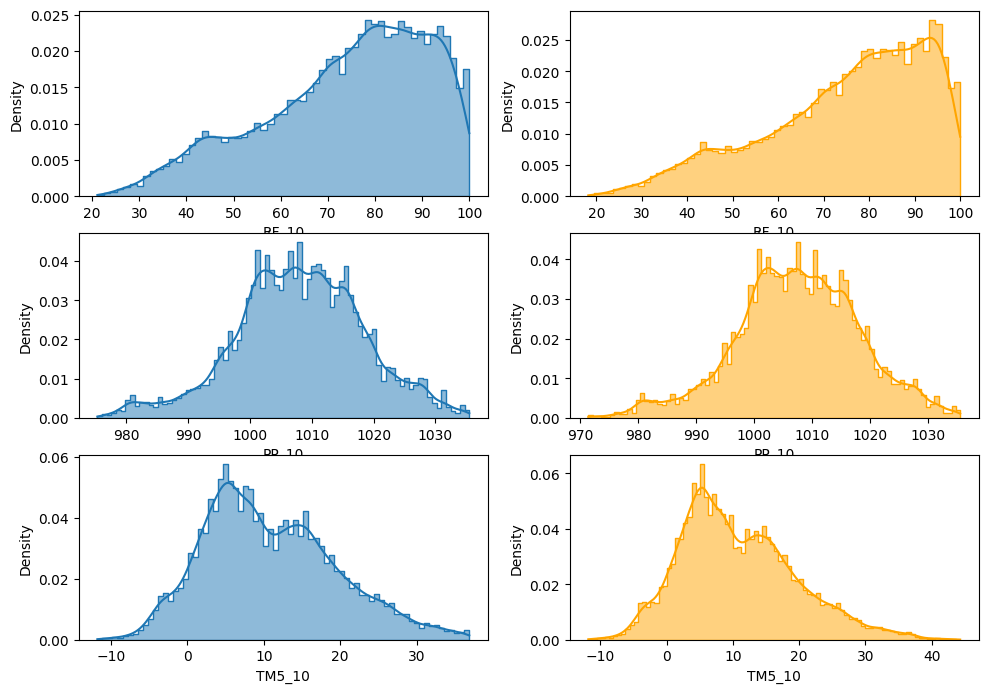

In [214]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)


plt.subplot(421)
#plt.title("RWS_DAU_10", fontsize="small")
sns.histplot(df['RWS_DAU_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(422)
#plt.title("RWS_10", fontsize="small")
sns.histplot(df_with_outliers['RWS_DAU_10'], kde=True, element="step", stat="density", color = "orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(423)
#plt.title("DS_10", fontsize="small")
sns.histplot(df['DS_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(424)
#plt.title("GS_10", fontsize="small")
sns.histplot(df_with_outliers['DS_10'], kde=True, element="step", stat="density", color = "orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(425)
#plt.title("SD_10", fontsize="small")
sns.histplot(df['SD_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(426)
#plt.title("FF_10", fontsize="small")
sns.histplot(df_with_outliers['SD_10'], kde=True, element="step", stat="density", color = "orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(427)
#plt.title("RWS_DAU_10", fontsize="small")
sns.histplot(df['RWS_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(428)
#plt.title("RWS_10", fontsize="small")
sns.histplot(df_with_outliers['RWS_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

###################################################

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(421)
#plt.title("DS_10", fontsize="small")
sns.histplot(df['GS_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(422)
#plt.title("GS_10", fontsize="small")
sns.histplot(df_with_outliers['GS_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(423)
#plt.title("SD_10", fontsize="small")
sns.histplot(df['FF_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(424)
#plt.title("FF_10", fontsize="small")
sns.histplot(df_with_outliers['FF_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(425)
#plt.title("DD_10", fontsize="small")
sns.histplot(df['DD_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(426)
#plt.title("PP_10", fontsize="small")
sns.histplot(df_with_outliers['DD_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(427)
#plt.title("TT_10", fontsize="small")
sns.histplot(df['TT_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(428)
#plt.title("TM5_10", fontsize="small")
sns.histplot(df_with_outliers['TT_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

###################################################

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(421)
#plt.title("RF_10", fontsize="small")
sns.histplot(df['RF_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(422)
#plt.title("RF_10", fontsize="small")
sns.histplot(df_with_outliers['RF_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(423)
#plt.title("DD_10", fontsize="small")
sns.histplot(df['PP_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(424)
#plt.title("PP_10", fontsize="small")
sns.histplot(df_with_outliers['PP_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(425)
#plt.title("TT_10", fontsize="small")
sns.histplot(df['TM5_10'], kde=True, element="step", stat="density")
#plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(426)
#plt.title("TM5_10", fontsize="small")
sns.histplot(df_with_outliers['TM5_10'], kde=True, element="step", stat="density", color="orange")
#plt.xlabel('Value')
plt.ylabel('Density')

**Merging**

In [216]:
# Define a custom aggregation dictionary for each column
aggregation_dict = {
    'RWS_DAU_10':   'sum',      # Regendauer (10-min Messungen)
    'RWS_10':       'sum',      # Regenmenge (Höhe in mm, 10-min Messungen)
    'DS_10':        'sum',      # Diffuse Strahlung (10-min Messungen)
    'GS_10':        'sum',      # Globale Strahlung (10-min Messungen)
    'SD_10':        'sum',      # Sonnenschein-Dauer (10-min Messungen)
    'FF_10':        'mean',     # Durchschn. Windgeschwindigkeit
    'DD_10':        'mean',     # Durchschn. Windrichtung
    'PP_10':        'mean',     # Luftdruck auf Höhe der Messstation
    'TT_10':        'mean',     # Lufttemperatur 2 m über dem Boden
    'TM5_10':       'mean',     # Lufttemperatur 5 cm über dem Boden
    'RF_10':        'mean'      # Relative Luftfeuchtigkeit
}

# Convert the 'rec_time' column to datetime if it's not already
df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], utc=True)
# Set the 'rec_time' column as the index
df.set_index('MESS_DATUM', inplace=True)

# Apply the aggregation using the agg method
saved_df = df.resample('1H').agg(aggregation_dict)

# Display the resulting DataFrame
print(saved_df)
saved_df = saved_df.reset_index()
print(saved_df)

                           RWS_DAU_10  RWS_10  DS_10  GS_10  SD_10     FF_10  \
MESS_DATUM                                                                     
2019-01-01 00:00:00+00:00        13.0    0.00    0.0    0.0    0.0  5.400000   
2019-01-01 01:00:00+00:00        35.0    0.03    0.0    0.0    0.0  6.375000   
2019-01-01 02:00:00+00:00        30.0    0.03    0.0    0.0    0.0  6.940000   
2019-01-01 03:00:00+00:00         0.0    0.00    0.0    0.0    0.0  6.400000   
2019-01-01 04:00:00+00:00         8.0    0.00    0.0    0.0    0.0  7.525000   
...                               ...     ...    ...    ...    ...       ...   
2019-12-31 19:00:00+00:00         0.0    0.00    0.0    0.0    0.0  2.000000   
2019-12-31 20:00:00+00:00         0.0    0.00    0.0    0.0    0.0  1.933333   
2019-12-31 21:00:00+00:00         0.0    0.00    0.0    0.0    0.0  1.733333   
2019-12-31 22:00:00+00:00         0.0    0.00    0.0    0.0    0.0  1.383333   
2019-12-31 23:00:00+00:00         0.0   